<a href="https://colab.research.google.com/github/unpackAI/Ai101/blob/main/Week_1_Computer%20Vision/01_CV_Coursebook_Stripped_for_High_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title ## 🔗 Install & Import Required Code Packages
!pip install -Uqq unpackai
!pip install -Uqq fastbook
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

# Install & import `DuckDuckGoImageScraper` specific packages
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from pathlib import Path
from jmd_imagescraper.core import *

     |████████████████████████████████| 73 kB 908 kB/s 
     |████████████████████████████████| 42 kB 701 kB/s 
     |████████████████████████████████| 976 kB 14.7 MB/s 
     |████████████████████████████████| 719 kB 7.2 MB/s 
     |████████████████████████████████| 1.3 MB 55.3 MB/s 
     |████████████████████████████████| 4.7 MB 48.5 MB/s 
     |████████████████████████████████| 365 kB 67.4 MB/s 
     |████████████████████████████████| 212 kB 76.0 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 115 kB 76.1 MB/s 
     |████████████████████████████████| 141 kB 76.1 MB/s 
     |████████████████████████████████| 596 kB 72.6 MB/s 
     |████████████████████████████████| 127 kB 62.7 MB/s 
     |████████████████████████████████| 6.6 MB 46.3 MB/s 


# Introduction to Computer Vision

## What is Computer Vision in Machine Learning?

Computer Vision, often abbreviated as CV, is a field of application in Machine Learning (ML) that seeks to develop techniques to help computers “see” and understand the content of digital images such as photographs and videos to derive meaningful information.

### Applications in Computer Vision

#### Image Classification

In Image Classification, the model attempts to distinguish between and classify an entire entire image or photograph. The model is trained on a dataset that provides the image and a label (a caption that says what the image visualizes). The labels are predefined and fit into a set of classes such as "cat" or "dog". After training the model can identify patterns and correctly classify the right class.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_CVImageClassification.png?raw=1" alt="classification" width="500"/>

#### Object Detection

Object detection is the task of classifying and localising one or more objects within one image. This task is more complex than simple image classification.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_ObjectDetection.webp?raw=1
" alt="objectdetection" width="500"/>

#### Style Transfer

Style transfer or neural style transfer is the task of learning style from one or more images and applying that style to a new image. This task can be thought of as a type of photo filter or transform that may not have an objective evaluation.

<img src="https://github.com/unpackAI/DL101/blob/main/images/StyleTransfer.webp?raw=1" alt="styletransfer" width="500"/>

#### Image colorization

Image colorization involves converting a grayscale image to a full color image. Similarly like *Style Transfer*, this task can be thought of as a type of photo filter or transform that may not have an objective evaluation.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_Image%20Colorization.webp?raw=1" alt="imagecolorization" width="500"/>

#### Image Synthesis

Image synthesis is the task of generating targeted modifications of existing images such as changing the style of an object in a scene or adding an object or face to a scene. The generation of entirely new images is also possible.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_Image%20Synthesis.webp?raw=1" alt="imagesynthesis" width="500"/>

#### Other applications

There are also other applications such as reconstructing, increasing the resolution of images, Image Describing or Text-to-Image. However, we will not further dive into these as we want to keep our focus on the content below.

### What are success cases of Computer Vision applications in Business?

[SenseTime](https://www.sensetime.com/en), currently the world's most valuable artificial intelligence company is most well known for their facial recognition technology. With China’s Ministry of Public Security, as one of their major clients they have access to public data to build powerful AI-driven Computer Vision applications that are able to identify the identity of individuals even when they are wearing masks. This technology is powerful tool to fight against COVID and terrorism.



<img src="https://github.com/unpackAI/DL101/raw/main/images/cv_SenseTimeCV.png" alt="classification" width="500"/>

[Google Cloud](https://cloud.google.com/), a cloud computing platform from Google offers AI-driven Visual Inspection solutions to improve Quality Management in manufacturing. In an example below, the system takes an image of a phone during the manufacturing process and the computer vision application classifies it according to a quality standard. Morever, the defects are also identifies and marked. 

<img src="https://github.com/unpackAI/DL101/raw/main/images/cv_GC1016_VIAI_Sizzle_640x480.gif" alt="classification" width="500"/>

Aside from the examples above, AI-driven Computer Vision applications have proven to drive revenue and efficiency in Manufacturing, Healthcare, Agriculture, Transportation, Retail and Sports.

### How are machines able to process and "see" images?

In all of the applications above, the model is expected to "see" and understand the content of digital images. But how does a machine visualize images?

As it turns out, a machine sees an image as pixels as its the smallest unit in an image. In the visualization below, you can see exactly how a machine "sees" a 3. Each pixel has a minimum of 0 and a maximum of 255. The higher the number the darker the pixel. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our initial learning and experiments. We will build up to bigger, full-color images soon.) 

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_3inpixels.png?raw=1" alt="3inpixels" width="500"/>

The example above is a black and white image. How could a machine "see" a multicolored image using pixels? When we take a digital image, it is stored as a combination of pixels. Each pixel contains a different number of channels. If it is a black-and-white image, it has only one pixel, whereas if it is a coloured image, it contains three channels: red, green and blue.

As shown in the visualization of a digital coloured image below, each channel of each pixel has a value between 0 and 255. Each of these values represented in binary before a computer can understand the image.

<img src="https://github.com/unpackAI/DL101/blob/main/images/cv_multicoloredimage.jpeg?raw=1" alt="multicoloredimage" width="300" height="300"/>

Once we understand how a machine is able to process images, how can we apply machine learning for it to be able to learn and classify an image to different classes such as a "dog" or "cat"?

Similar to how a kid is taught to identify a cat, a machine learning model can be taught how to identify a cat in an image by giving several example images that contain a cat. From these example images, the model is processing the images and its pixels and learns and understand the features of a cat, like its shape and colour. Now when a new image of a cat is presented to this computer with this model, it can use what it had learned about cats earlier and identify that this new image also contains cat.

The above is a classical example of Image Classification. Luckily, we will now build our own Image Classification model. For that, we will look at the Machine Learning Workflow that we have previously learned. 

### Image Classification Machine Learning Workflow

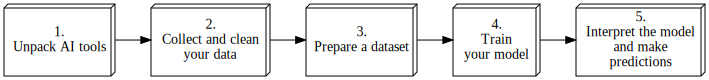

In [2]:
#@title
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="1. \nUnpack AI tools"]
dataset[shape=box3d width=1 height=1 label="2. \nCollect and clean \n your data"]
transform[shape=box3d width=1 height=1 label="3. \nPrepare a dataset"]
train[shape=box3d width=1 height=1 label="4. \nTrain \n your model"]
predict[shape=box3d width=1 height=1 label="5. \nInterpret the model \n and make \n predictions"]
problem->dataset->transform->train->predict''')

1. *Unpack AI tools* Import AI building tools to create your image recognition model. These tools are Python and Machine Learning libraries. *The step 1 was already done in the beginnig of this tutorial.* 

2. *Collect and clean your data:* Collect all your images, remove faulty images, seperate them into classes and provide labels.

3. *Prepare a dataset:* Transform images and split them into different sets of data to prepare for model training.

4. *Train your model:* Train your model on images and the labels for it to learn patterns, colors or shapes in the images.

5. *Interpret the model and make predictions:* Measure the performance of the image classifier and test out its accuracy by making predictions on images that it has never seen before.

Lets go through the steps one by one!

## 2. Collect and construct your dataset



In order to collect and design your own dataset we provide you with the scraping tool below.

**DuckDuckGo Image Scraper** - Scrape and Collect images via a search engine from the web.

In order to collect your images we will be utilizing **DuckDuckGo**. DuckDuckGo is an internet search engine that emphasizes protecting searchers' privacy and avoiding the filter bubble of personalized search results.

The below is a slightly modified version of the notebook by [Jew Dockrill](https://joedockrill.github.io/jmd_imagescraper/). Many thanks to him for the notebook and the package he wrote.

For the sake of learning, we will collect the 450 images of bears seperated in 3 different classes that each have a set of 150 images. The three classes are: "black", "grizzly" and "teddy". The goal of the following exercises is to build an image classification model that is able to differentiate between these 3 classes, and correctly predict one of them when provided an image that it has never seen before.

> Note: When using a Web Search Engine to download your pictures, there's no way to be sure exactly what images a search like this will find. The results can change over time. We've heard of at least one case of a community member who found some unpleasant pictures in their search results. You'll receive whatever images are found by the web search engine. If you're running this at work, or with kids, etc, then be cautious before you display the downloaded images.

### 2.1 Download images

Google Colab offers a handy convinience to use your Google Drive (a cloud storage and file sharing platform) for storing and accessing the personal data. We will utilize the Drive to downloading the images directly to one of the folders. To access the Drive through this notebook, run the cell below:

**Note: Please give the permissions to access the Google Drive files**





In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = Path("/content/gdrive/MyDrive/images")  # Comment: You can store in a different Google Drive Folder
number_images_to_download = 150         

duckduckgo_search(path, "teddy", "teddy bear", max_results=number_images_to_download)
duckduckgo_search(path, "grizzly", "grizzly bear", max_results=number_images_to_download)
duckduckgo_search(path, "black", "black bear", max_results=number_images_to_download)

Duckduckgo search: teddy bear


Duckduckgo search: grizzly bear


Duckduckgo search: black bear


[Path('/content/gdrive/MyDrive/images/black/001_2f6cd67c.jpg'),
 Path('/content/gdrive/MyDrive/images/black/002_041fe09e.jpg'),
 Path('/content/gdrive/MyDrive/images/black/003_a7c9aa44.jpg'),
 Path('/content/gdrive/MyDrive/images/black/004_d99cad1b.jpg'),
 Path('/content/gdrive/MyDrive/images/black/005_3cf7c80c.jpg'),
 Path('/content/gdrive/MyDrive/images/black/006_985ddc2d.jpg'),
 Path('/content/gdrive/MyDrive/images/black/007_8c863d52.jpg'),
 Path('/content/gdrive/MyDrive/images/black/008_5de4d871.jpg'),
 Path('/content/gdrive/MyDrive/images/black/009_91ff0444.jpg'),
 Path('/content/gdrive/MyDrive/images/black/010_8b8a3070.jpg'),
 Path('/content/gdrive/MyDrive/images/black/011_2e7d69c1.jpg'),
 Path('/content/gdrive/MyDrive/images/black/012_5db8adff.jpg'),
 Path('/content/gdrive/MyDrive/images/black/013_d64f0a03.jpg'),
 Path('/content/gdrive/MyDrive/images/black/014_25dc8334.jpg'),
 Path('/content/gdrive/MyDrive/images/black/015_899de5c4.jpg'),
 Path('/content/gdrive/MyDrive/images/bl

In case if you want to modify the code to your own use case. You will have to:

1. `path`: Define the `path` which will be the folder in which you will temporarily save the images. Once you disconnect, the images will be deleted.
1. `number_images_to_download`: The number of images you download per defined class. This can go up to 477 at the time of writing.
1. `duckduckgo_search`: You will have to define your **classes** (for example: teddy, grizzly, black) and your **search term** (for example: teddy bear, grizzly bear, black bear).

> Note: When downloading the images please make sure to check your search terms ahead of running the script below. Go and search for yourself to define the best search terms.


### 2.2 Displaying the image cleaner

Use this to get rid of unsuitable images without leaving your notebook.

In [5]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

Some time especially in real life projects, erronous image is a frequently occuring thing, you can fix the problem by deleting all of our faulty images. 

In [6]:
clean_error_img(path)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

Now that we have downloaded some data, we need to transform and assemble it in a format suitable for model training.

## 3. Prepare a dataset

In this step you will first split all your downloaded images into two sets that have their own purposes and then create a **DataBlock (a bundle of prepared images that are finally ready for a model training.)**

The training data makes up the **training set** and the validation data makes up the **validation set**. Both are at the core of every supervised learning machine learning task.

> The *training set* is the set of data used to start training the model. The model uses the training data to optimise its parameters and minimize loss.

> The *validation set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters.

Note, that the data in the training or validation is randomly distributed, so there is no inherent difference in the training or validation data. The difference is in their purpose.

Aside from the **training set** and **validation set**, we should also mention the **test set**.

> The *test set* is the sample of data used to evaluate the final model without continuing to optimise its parameters.

Below, you can see the script to create `DataBlock`. A lot of code, right? Do not worry. We will go one by one over every line of code and define its function. That is important because each line of code represents an important aspect in Machine Learning.

```python
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=Resize(128)
)
```

Let's look at each of these arguments in turn. In the `blocks` argument, we specify our dependent variable (variable that depends on changes of the independent variable) and independent variables (variables that are independent of other variables and have an impact on the dependant variable) and. We want to predict the dependant variable which in our case is the correct label of the image. The independant variables are images.

In order to specify that our inputs are images and our targets are categories we use ImageBlock (i.e. images = independent variable) and CategoryBlock (label = name of folder: teddy, grizzly and black).

```python
blocks=(ImageBlock, CategoryBlock)
```


For this `DataBlocks` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and automatically returns a list of all of the images in that path:

```python
get_items=get_image_files
```


The `splitter` below will help us to split our data into the **training set** and **validation set** (Note: Remember the difference).

Using `valid_pct=0.2` we split our dataset in a way that 80% of our data will be part of the training set and 20% of our data part of the validation set. The 20% that is part of the validation set is selected randomly.


```python
splitter = RandomSplitter(valid_pct=0.2)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset. `parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

```python
get_y=parent_label
```

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, class/category, or so forth. We use the `Resize` transform here. The higher the number in the bracket the bigger the size of the image.

```python
item_tfms=Resize(128)
```

Now that we have defined each line in our `DataBlock`, lets run the code.

In [7]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(250, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

Lets have a look at our images by calling the `show_batch` method on our `DataLoaders`. Feel free to change the amount of `man_n` (amount of images to be shown) and `nrows` (amount of rows).

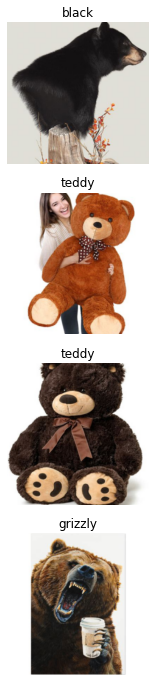

In [8]:
dls.valid.show_batch(max_n=4, nrows=4)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## 4. Training Your Model, and Using It to Clean Your Data

We can now finally train our model and create our `Learner` to fine-tune it in the usual way. Note that we are utilizing a pre-trained neural network called `resnet18`.

In [9]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.827504,0.354133,0.866667,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.498926,0.258790,0.933333,00:04
1,0.429878,0.215330,0.944444,00:04
2,0.350413,0.207870,0.944444,00:05


After the training is done, you will be able to view different metrics per epoch. All are briefly described below.


> `train_loss`: Training loss is the error on the **training set** of data. This represents how well the model performs exclusively on the training data.

> `valid_loss`: Validation loss is the error after running the **validation set** of data through the trained network. This represents how well the model performs exclusively on the validation data AFTER being trained on the training data.

> `accuracy`: Accuracy is the percent of correctly predicted data points out of the validation data points. Note, that we will *always* show you your model's accuracy using *only* the validation set, *never* the training set. This is absolutely critical, because if you train a large enough model for a long enough time, it will eventually memorize the label and patterns of every item in your dataset! The result will not actually be a useful model, because the model simply memorized only the images that it has been trained on. But what we acually care about is how well our model works on *previously unseen images*. That is always our goal when creating a model: for it to be useful on data that the model only sees in the future, after it has been trained.
Even when your model has not fully memorized all your data, earlier on in training it may have memorized certain parts of it. As a result, the longer you train for, the better your accuracy will get on the training set; the validation set accuracy will also improve for a while, but eventually it will start getting worse as the model starts to memorize the training set, rather than finding generalizable underlying patterns in the data. When this happens, we say that the model is *overfitting*.

The above leaves us with a few very important conclusions. Try to go through them and explain it to yourself. If you feel unclear, make sure to bring it up with the group. We will also discuss the concept of overfitting and underfitting.

Conclusions: 

1.   If the `train_loss` is decreasing while the `valid_loss` is increasing this means that your model is overfitting.
2.   If the `train_loss`, `valid_loss` and `error_rate` are very high and are further decreasing that means your model is underfitting (= unable to capture the relationship between the input and output variables accurately).
3. As long as `valid_loss` is decreasing (even if your `accurace` is staying the same), your models performance is getting better and better. That is why you need to train more and more epochs until your `valid_loss` is not further decreasing.



Now let's interpret our results and put them into context. To visualize where our model was confused and made errors (if at all), we can create a *confusion matrix*:

The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal blocks represent those which were classified incorrectly. This is one of the many ways that allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. Our bear classifier isn't making many mistakes!

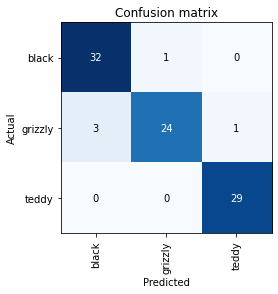

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In the case, that you encountered any incorrect predictions, it's also helpful to see where exactly our errors are occurring. This could provide us insights to see if its a problem with the data itself (e.g., images that aren't bears at all, or are labeled incorrectly, etc.) or indeed with the model (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we rank rank the images with the highest loss. Remember that we are calculating the loss for every images in order to improve our models parameters/weights.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. 

For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction (predicted class of model), actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction.

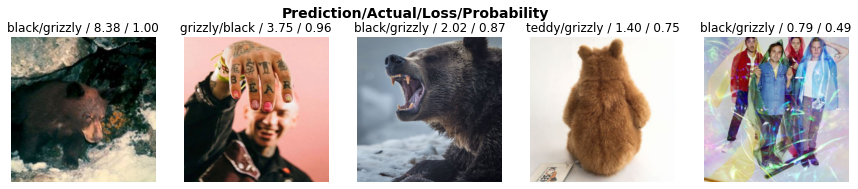

In [11]:
interp.plot_top_losses(5, nrows=1)

You might encounter cases like we described above, in which the label might be wrong or the image is simply out of the scope of any classes.

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

Below we will be using `display_image_cleaner` one more time to get rid off the images that confused the model

In [12]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

> NOTE: If you have changed the dataset by either deleting or changing the classes of the images you will have to rebuild your datablock like we have done so above. After that you can retrain the model and compare the accuracy.

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = bears.dataloaders(path)

In [14]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,1.576799,0.292867,0.888889,00:03


epoch,train_loss,valid_loss,accuracy,time
0,0.338912,0.248895,0.911111,00:03
1,0.316254,0.240018,0.922222,00:03
2,0.280389,0.225549,0.933333,00:03
3,0.243742,0.213300,0.933333,00:03


> note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing a very high accuracy on this task. To achieve this, it didn't require a huge dataset of us. As you can see, the common complaint that you need massive amounts of data to do deep learning is simply not true.

## 5. Make predictions: Create a Notebook App from the Model

In [15]:
#@title Build the functionality of our Notebook App
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])

Great job! You have successfully build your first image classifier notebook app.